In [179]:
import pandas as pd
import numpy as np 
import yfinance as yf

## Data preparation

In [180]:
tickers=['AGRO.BA','ALUA.BA','AUSO.BA','BBAR.BA','BHIP.BA','BMA.BA',
         'BOLT.BA','BPAT.BA','BRIO.BA','BYMA.BA','CADO.BA','CAPX.BA',
         'CARC.BA','CECO2.BA','CELU.BA','CEPU.BA','CGPA2.BA','COME.BA',
         'CRES.BA','CTIO.BA','CVH.BA','DGCU2.BA','EDN.BA','FERR.BA',
         'GAMI.BA','GARO.BA','GCLA.BA','GGAL.BA','GRIM.BA','HARG.BA','HAVA.BA',
         'INAG.BA','INTR.BA','INVJ.BA','IRCP.BA','IRSA.BA','LOMA.BA','LEDE.BA',
         'LONG.BA','METR.BA','MIRG.BA','MOLA.BA','MOLI.BA','MORI.BA',
         'OEST.BA','PAMP.BA','PATA.BA','ROSE.BA','SAMI.BA','SEMI.BA',
         'SUPV.BA','TECO2.BA','TGNO4.BA','TGSU2.BA','TRAN.BA','TXAR.BA','YPFD.BA']

tickers_str=" ".join(tickers)
market=yf.Tickers(tickers_str)

market_df = market.history(period="6mo")

market_close = market_df["Close"]

[*********************100%%**********************]  57 of 57 completed


In [181]:
#Log return of stocks
stocks_return = np.log(1+market_close.pct_change())
stocks_return.head()

C:\Users\PC1\AppData\Local\Temp\ipykernel_93340\1534124368.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  stocks_return = np.log(1+market_close.pct_change())


Ticker,AGRO.BA,ALUA.BA,AUSO.BA,BBAR.BA,BHIP.BA,BMA.BA,BOLT.BA,BPAT.BA,BRIO.BA,BYMA.BA,...,ROSE.BA,SAMI.BA,SEMI.BA,SUPV.BA,TECO2.BA,TGNO4.BA,TGSU2.BA,TRAN.BA,TXAR.BA,YPFD.BA
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-04,-0.020800,-0.040185,0.011163,-0.025969,-0.026202,-0.027741,0.012712,0.010992,0.0,-0.006383,...,0.000000,-0.143435,0.012955,-0.023072,-0.002523,0.033283,-0.035146,0.024711,-0.053708,-0.032889
2024-04-05,0.069435,-0.019778,0.058492,0.046116,0.031361,0.019814,-0.007396,0.047277,0.0,-0.012169,...,0.011099,0.012725,-0.002478,0.037240,-0.022634,0.037920,0.064020,0.047662,-0.042425,0.027255
2024-04-08,0.072633,0.042768,0.055097,-0.002121,0.061532,0.000326,0.005288,0.153441,0.0,0.013591,...,-0.029117,-0.015513,0.004950,0.007167,0.007870,-0.013305,-0.024552,0.038732,0.039320,0.021741
2024-04-09,-0.005775,0.064277,-0.025501,0.002607,0.017586,0.007655,-0.015949,0.115699,0.0,0.060311,...,-0.027652,-0.069950,0.012270,-0.005864,0.004431,-0.040367,-0.039267,-0.014694,0.051511,0.004707


## Basic functions construction

In [182]:
#Log return
def portfolio_return(ticker,weights):
    return np.dot(ticker.mean(),weights)*25

#Standart deviation
def portfolio_std(ticker,weights):
    return (np.dot(np.dot(ticker.cov(),weights),weights))**(1/2)*np.sqrt(25)

#Weights generator
def weights_gen(ticker):
    w_random = np.random.random(len(ticker.columns))
    w_random /= w_random.sum()
    return w_random


In [183]:
#Return efficient frontier in a dataframe
def frontier(stocks , iterations):
     
     returns = []
     stds = []
     w = []

     for i in range(iterations): 
         weights = weights_gen(stocks)
         returns.append(portfolio_return(stocks,weights ))
         stds.append(portfolio_std(stocks ,weights ))
         w.append(weights)

     frontier = pd.DataFrame({"Return" : returns , "Risk" : stds , "weights" : w})

     return frontier

## Finding the best portfolio given a list of stocks and an upper bound risk

In [184]:
#Set the stocks to study
global prefered_stocks

prefered_stocks = ["BOLT.BA","COME.BA","CRES.BA"]

<Axes: xlabel='Risk', ylabel='Return'>

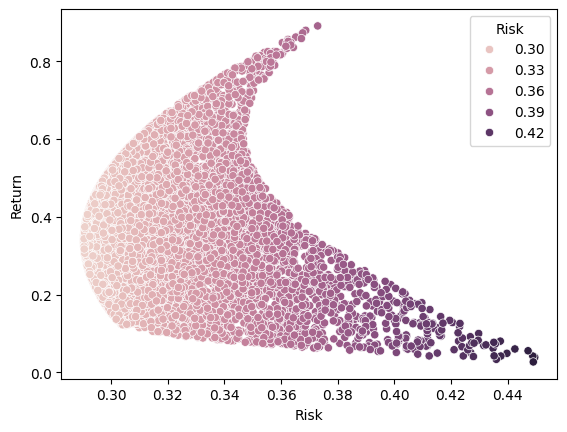

In [185]:
#Plot efficience frontier for prefered stocks

import seaborn as sns

effi_frontier = frontier(stocks_return.loc[:,prefered_stocks] , 10000)

sns.scatterplot(data = effi_frontier , x="Risk" , y="Return" , hue="Risk")


In [186]:

#Return the best portfolio´s weights given an upper bound risk
def find_best(risk, portfolio_frontier):

    filter = portfolio_frontier[ portfolio_frontier.Risk <= risk ].Return.idxmax()

    return portfolio_frontier.loc[filter].weights
 

([<matplotlib.patches.Wedge at 0x1bb05ee50d0>,
 [Text(1.0879882668918954, 0.16211579536112444, 'BOLT.BA'),
  Text(-0.2872805563162713, 1.0618238469551406, 'COME.BA'),
  Text(0.12765405190521611, -1.0925678207929157, 'CRES.BA')],
 [Text(0.5934481455773974, 0.08842679746970424, '5%'),
  Text(-0.1566984852634207, 0.579176643793713, '49%'),
  Text(0.06962948285739061, -0.595946084068863, '46%')])

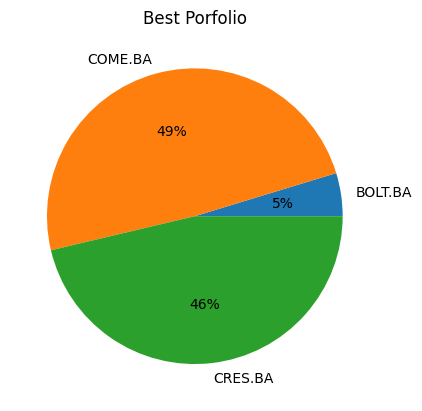

In [187]:
#Plot the best portfolio
import matplotlib.pyplot as plt

plt.title("Best Porfolio")
plt.pie(find_best(0.30 , effi_frontier) ,labels=prefered_stocks , autopct='%1.0f%%' )
